### Deliverable 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("C:\\Users\\kd6kx\\Neural_Network_Charity_Analysis\\charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop('EIN',axis=1)
application_df = application_df.drop('NAME',axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
df = pd.DataFrame()
df.index = application_df.columns
df.insert(0,'nunique',[0,0,0,0,0, 0,0,0,0,0])
for index, row in df.iterrows():
    row['nunique'] = application_df[index].nunique()
print(df)


                        nunique
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2


In [4]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
 
counts = application_df.groupby('APPLICATION_TYPE').size()
counts.sort_values(ascending=False)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

<AxesSubplot:ylabel='Density'>

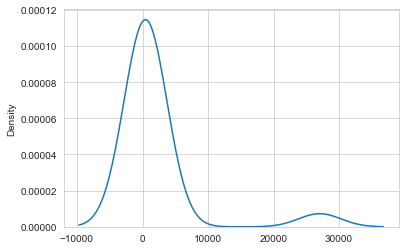

In [5]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
import seaborn as sns
sns.set_style('whitegrid')
sns.kdeplot(np.array(application_df.groupby('APPLICATION_TYPE').size().sort_values(ascending=False)), bw_method=0.5)


In [6]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(counts[counts < 10].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
T9         156
T13         66
T12         27
T2          16
Other       11
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
counts2 = application_df.groupby('CLASSIFICATION').size()
counts2.sort_values(ascending=False)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C2190        1
C2380        1
C2500        1
C2561        1
C8210        1
Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

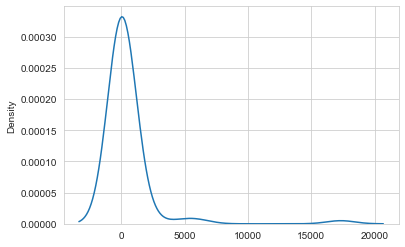

In [8]:
# Visualize the value counts of CLASSIFICATION
sns.kdeplot(np.array(application_df.groupby('CLASSIFICATION').size().sort_values(ascending=False)), bw_method=0.5)


In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(counts2[counts2 < 10].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
Other       98
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
 
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

C:\Users\kd6kx\AppData\Local\Temp/ipykernel_12188/2023052568.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
application_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T3,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34294,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34295,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34296,1,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
34297,1,5000,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
 
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL',axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
 

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [17]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 5
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()
 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 576       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________


In [18]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
# Train the model + with save every 5 epochs
mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, save_freq=5)
nn.fit(X_train, y_train, epochs=15, callbacks=[mc])

Epoch 1/15
804/804 [==============================] - 3s 3ms/step - loss: 146051.7500 - accuracy: 0.5234
Epoch 2/15
804/804 [==============================] - 3s 3ms/step - loss: 0.7391 - accuracy: 0.4679: 0s - loss: 0.7419 - ac
Epoch 3/15
804/804 [==============================] - 3s 3ms/step - loss: 0.7034 - accuracy: 0.4679: 0s - loss: 0.7039 - accuracy: 
Epoch 4/15
804/804 [==============================] - 3s 3ms/step - loss: 0.6929 - accuracy: 0.5089
Epoch 5/15
804/804 [==============================] - 3s 3ms/step - loss: 0.6912 - accuracy: 0.5321: 1s - loss: 0.6917 - accuracy: 0.52 - ETA: 1s - loss: 0 - ETA
Epoch 6/15
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5321: 0s - loss: 0.6912 
Epoch 7/15
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 8/15
804/804 [==============================] - 2s 3ms/step - loss: 0.6911 - accuracy: 0.5321: 2s - loss: 0 - ETA: 1s - loss: 0.6 - ETA: 1s - loss: - E

In [20]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7207 - accuracy: 0.5332 - 204ms/epoch - 760us/step
Loss: 0.720725417137146, Accuracy: 0.5331778526306152


In [21]:
nn.save("AlphabetSoupCharity.h5")

In [32]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn2 = tf.keras.models.Sequential()

nn2.add(tf.keras.layers.BatchNormalization())
nn2.add(tf.keras.layers.Dense(units=512, input_dim=number_input_features, activation="relu"))
nn2.add(tf.keras.layers.Dropout(.25))
nn2.add(tf.keras.layers.BatchNormalization())
nn2.add(tf.keras.layers.Dense(units=256, activation="relu"))
nn2.add(tf.keras.layers.Dropout(.25))
nn2.add(tf.keras.layers.BatchNormalization())
nn2.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn2.add(tf.keras.layers.Dropout(.25))
nn2.add(tf.keras.layers.BatchNormalization())
nn2.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn2.add(tf.keras.layers.Dropout(.25))
nn2.add(tf.keras.layers.BatchNormalization())
nn2.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn2.add(tf.keras.layers.Dropout(.25))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn2.build(input_shape=[1,71])
# Check the structure of the model
nn2.summary()
 

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_45 (Bat  (1, 71)                  284       
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (1, 512)                  36864     
                                                                 
 dropout_45 (Dropout)        (1, 512)                  0         
                                                                 
 batch_normalization_46 (Bat  (1, 512)                 2048      
 chNormalization)                                                
                                                                 
 dense_58 (Dense)            (1, 256)                  131328    
                                                                 
 dropout_46 (Dropout)        (1, 256)                

In [99]:
# Compile the model
nn2.compile(loss="MeanSquaredError", optimizer="adam", metrics=["accuracy"])
# Train the model + with save every 5 epochs
mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, save_freq=5)
nn2.fit(X_train, y_train, epochs=15, callbacks=[mc])

Epoch 1/15
804/804 [==============================] - 8s 9ms/step - loss: 0.2119 - accuracy: 0.6915
Epoch 2/15
804/804 [==============================] - 7s 9ms/step - loss: 0.1944 - accuracy: 0.7209
Epoch 3/15
804/804 [==============================] - 7s 8ms/step - loss: 0.1906 - accuracy: 0.7284
Epoch 4/15
804/804 [==============================] - 7s 9ms/step - loss: 0.1896 - accuracy: 0.7273: 1s -
Epoch 5/15
804/804 [==============================] - 7s 9ms/step - loss: 0.1884 - accuracy: 0.7302
Epoch 6/15
804/804 [==============================] - 7s 8ms/step - loss: 0.1880 - accuracy: 0.7285
Epoch 7/15
804/804 [==============================] - 7s 9ms/step - loss: 0.1875 - accuracy: 0.7296
Epoch 8/15
804/804 [==============================] - 7s 9ms/step - loss: 0.1875 - accuracy: 0.7313: 2s - los
Epoch 9/15
804/804 [==============================] - 7s 8ms/step - loss: 0.1869 - accuracy: 0.7301TA: 0s - loss:
Epoch 10/15
804/804 [==============================] - 7s 8ms/step - l

In [107]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

ValueError: in user code:

    File "C:\Users\kd6kx\miniconda3\envs\ia1\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\kd6kx\miniconda3\envs\ia1\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\kd6kx\miniconda3\envs\ia1\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\kd6kx\miniconda3\envs\ia1\lib\site-packages\keras\engine\training.py", line 1303, in test_step
        y_pred = self(x, training=False)
    File "C:\Users\kd6kx\miniconda3\envs\ia1\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\kd6kx\miniconda3\envs\ia1\lib\site-packages\keras\engine\input_spec.py", line 247, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_10" (type Sequential).
    
    Input 0 of layer "batch_normalization_45" is incompatible with the layer: expected axis 1of input shape to have value 71, but received input with shape (None, 68)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 68), dtype=float32)
      • training=False
      • mask=None


In [98]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn3 = tf.keras.models.Sequential()

nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dense(units=512, input_dim=number_input_features, activation="relu"))
nn3.add(tf.keras.layers.Dropout(.25))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dense(units=256, activation="relu"))
nn3.add(tf.keras.layers.Dropout(.25))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn3.add(tf.keras.layers.Dropout(.25))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn3.add(tf.keras.layers.Dropout(.25))
nn3.add(tf.keras.layers.BatchNormalization())
nn3.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn3.add(tf.keras.layers.Dropout(.25))

# Output layer
nn3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn3.build(input_shape=[1,71])
# Check the structure of the model
nn3.summary()


Model: "sequential_66"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_105 (Ba  (1, 71)                  284       
 tchNormalization)                                               
                                                                 
 dense_128 (Dense)           (1, 512)                  36864     
                                                                 
 dropout_105 (Dropout)       (1, 512)                  0         
                                                                 
 batch_normalization_106 (Ba  (1, 512)                 2048      
 tchNormalization)                                               
                                                                 
 dense_129 (Dense)           (1, 256)                  131328    
                                                                 
 dropout_106 (Dropout)       (1, 256)                

In [101]:
# Compile the model
nn3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model + with save every 5 epochs
mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, save_freq=5)
nn3.fit(X_train, y_train, epochs=15, callbacks=[mc])

Epoch 1/15
804/804 [==============================] - 8s 8ms/step - loss: 0.5521 - accuracy: 0.7335
Epoch 2/15
804/804 [==============================] - 7s 8ms/step - loss: 0.5494 - accuracy: 0.7352
Epoch 3/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5496 - accuracy: 0.7343
Epoch 4/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5511 - accuracy: 0.7346
Epoch 5/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5505 - accuracy: 0.7352
Epoch 6/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5492 - accuracy: 0.7342
Epoch 7/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5483 - accuracy: 0.7341
Epoch 8/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5473 - accuracy: 0.7369
Epoch 9/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5466 - accuracy: 0.7343
Epoch 10/15
804/804 [==============================] - 7s 9ms/step - loss: 0.5484 - accuracy: 0.7357

In [102]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("C:\\Users\\kd6kx\\Neural_Network_Charity_Analysis\\charity_data.csv")
application_df.head()

# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE
application_df = application_df.drop('EIN',axis=1)
application_df = application_df.drop('NAME',axis=1)
application_df

# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
df = pd.DataFrame()
df.index = application_df.columns
df.insert(0,'nunique',[0,0,0,0,0, 0,0,0,0,0])
for index, row in df.iterrows():
    row['nunique'] = application_df[index].nunique()
print(df)
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
 
counts = application_df.groupby('APPLICATION_TYPE').size()
counts.sort_values(ascending=False)

# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(counts[counts < 100].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()


# Determine which values to replace if counts are less than ..?
replace_class = list(counts2[counts2 < 10].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head() 

 
# Split our preprocessed data into our features and target arrays
y = application_df['IS_SUCCESSFUL'].values
X = application_df.drop('IS_SUCCESSFUL',axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)
  
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

                        nunique
APPLICATION_TYPE             17
AFFILIATION                   6
CLASSIFICATION               71
USE_CASE                      5
ORGANIZATION                  4
STATUS                        2
INCOME_AMT                    9
SPECIAL_CONSIDERATIONS        2
ASK_AMT                    8747
IS_SUCCESSFUL                 2


In [105]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])

nn4 = tf.keras.models.Sequential()

nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dense(units=512, input_dim=number_input_features, activation="relu"))
nn4.add(tf.keras.layers.Dropout(.25))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dense(units=256, activation="relu"))
nn4.add(tf.keras.layers.Dropout(.25))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dense(units=128, activation="relu"))
nn4.add(tf.keras.layers.Dropout(.25))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dense(units=64, activation="relu"))
nn4.add(tf.keras.layers.Dropout(.25))
nn4.add(tf.keras.layers.BatchNormalization())
nn4.add(tf.keras.layers.Dense(units=32, activation="relu"))
nn4.add(tf.keras.layers.Dropout(.25))

# Output layer
nn4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))
nn4.build(input_shape=[1,68])
# Check the structure of the model
nn4.summary()
# Compile the model
nn4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# Train the model + with save every 5 epochs
mc = tf.keras.callbacks.ModelCheckpoint('weights{epoch:08d}.h5', 
                                     save_weights_only=True, save_freq=5)
nn4.fit(X_train, y_train, epochs=15, callbacks=[mc])

Model: "sequential_68"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_115 (Ba  (1, 68)                  272       
 tchNormalization)                                               
                                                                 
 dense_140 (Dense)           (1, 512)                  35328     
                                                                 
 dropout_115 (Dropout)       (1, 512)                  0         
                                                                 
 batch_normalization_116 (Ba  (1, 512)                 2048      
 tchNormalization)                                               
                                                                 
 dense_141 (Dense)           (1, 256)                  131328    
                                                                 
 dropout_116 (Dropout)       (1, 256)                

In [106]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 2.3874 - accuracy: 0.5858 - 329ms/epoch - 1ms/step
Loss: 2.387423515319824, Accuracy: 0.5857725739479065


In [108]:
nn3.save("AlphabetSoupCharity_Optimization.h5")